In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("customer churn.csv")
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#lets inspect the data first 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#since the total charges have blank spaces as many customers have just started the services and the tenure month is also 0 
#therefore we have filled the totalcharges with 0 since the tenure is 0 and also changed its data type into float then the type wont show object.

df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#isnull checks the null values in the column if there is it would make that column true 

In [9]:
df.isnull().sum().sum() #it tells that total sum of the null values is 0 i.e, no null values inthe data

0

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [12]:
df.duplicated().sum()

0

In [13]:
#here we will check the duplicacy of data via checking the empid which should be unique for every employee

df["customerID"].duplicated().sum()

0

In [14]:
def conv(value):
    if value==1:
       return "yes"
    else:
       return "No"
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

In [15]:
df.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#converted 0 and 1 value of senior citizen to yes/no to understand easily

In [16]:
#to understand why customers that churned out

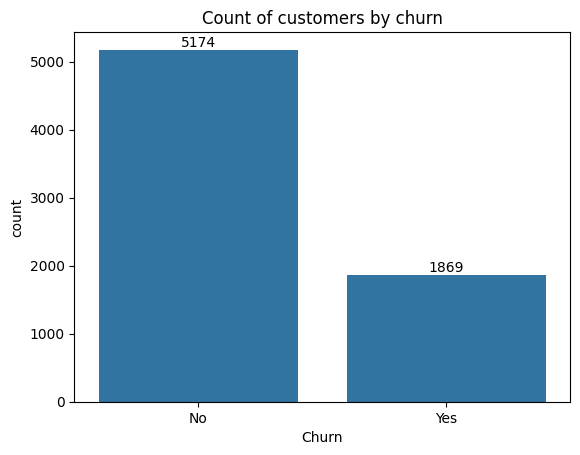

In [17]:
ax=sns.countplot(x=df["Churn"], data=df)   #countplot shows the count of values
ax.bar_label(ax.containers[0]) #shows the values of count
plt.title("Count of customers by churn")
plt.show()

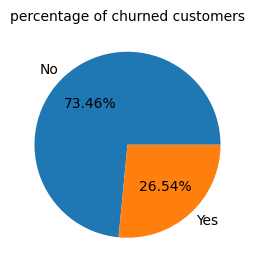

In [18]:
plt.figure(figsize=(3,4)) #this will improve the size of pie chart
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb["Churn"], autopct="%1.2f%%",labels=gb.index)
plt.title("percentage of churned customers",fontsize=10)
plt.show()

#overall 26.54% customers churned out
#now lets explore the reason behind why customers churned out

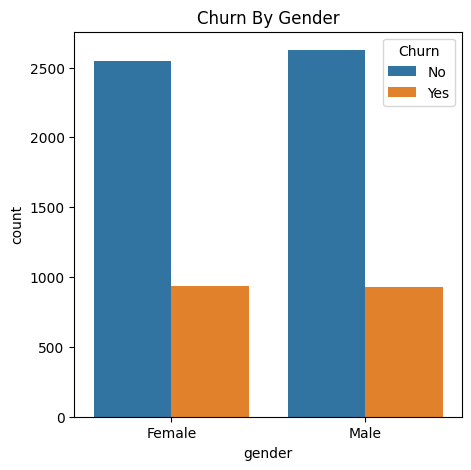

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(x="gender",data=df,hue="Churn") #it states that not on the basis gender as both male and female are churning out equally
plt.title("Churn By Gender")
plt.show()


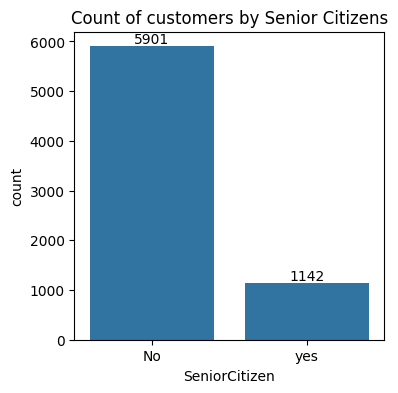

In [20]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Senior Citizens")
plt.show()

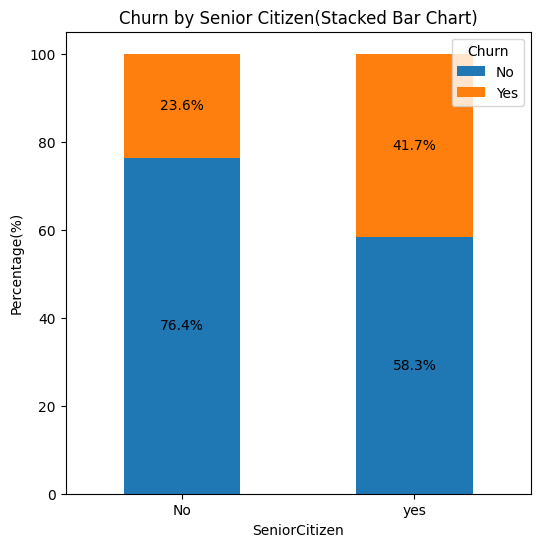

In [21]:
#calculate the percentages
total_counts=df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()*100

#plot
fig,ax=plt.subplots(figsize=(6,6))  #adjust figsize for better visualization

#plot the bars
total_counts.plot(kind='bar', stacked=True,ax=ax,color=['#1f77b4','#ff7f0e'])  #customize colors if desired 

#Add percentage labels on the bars
for p in ax.patches:
    width,height=p.get_width(), p.get_height()
    x,y=p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen(Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=0)
plt.legend(title='Churn',loc='upper right')  #customize legend location
plt.show()


#comparatively a greater percentage of senior citizen people have churned out

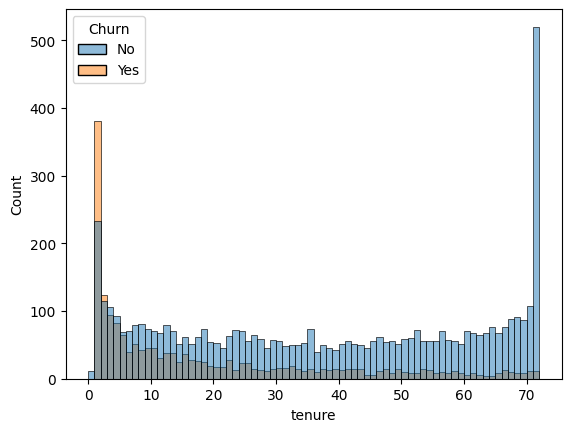

<Figure size 900x400 with 0 Axes>

In [22]:
#tenure based churn

sns.histplot(x="tenure", data=df, bins=72, hue="Churn")
plt.figure(figsize=(9,4))
plt.show()

#people who have used our services for longer time have stayed and people who have used our services for 1 or 2 months have churned

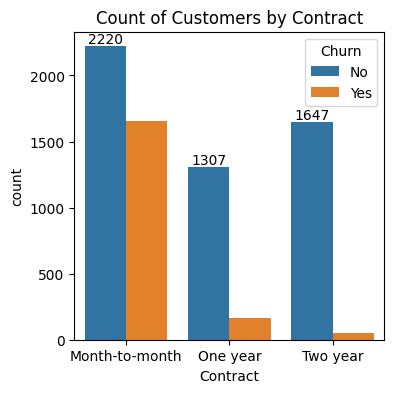

In [23]:
#count of people on the basis of contracts
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

#people who have month to month contract are likely to churn than from those who churn for one or 2 years

In [24]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
#'PhoneService', 'MultipleLines', 'InternetService',
       #'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       #'TechSupport', 'StreamingTV', 'StreamingMovies' creating subplots for these data where each plot would be a countplot


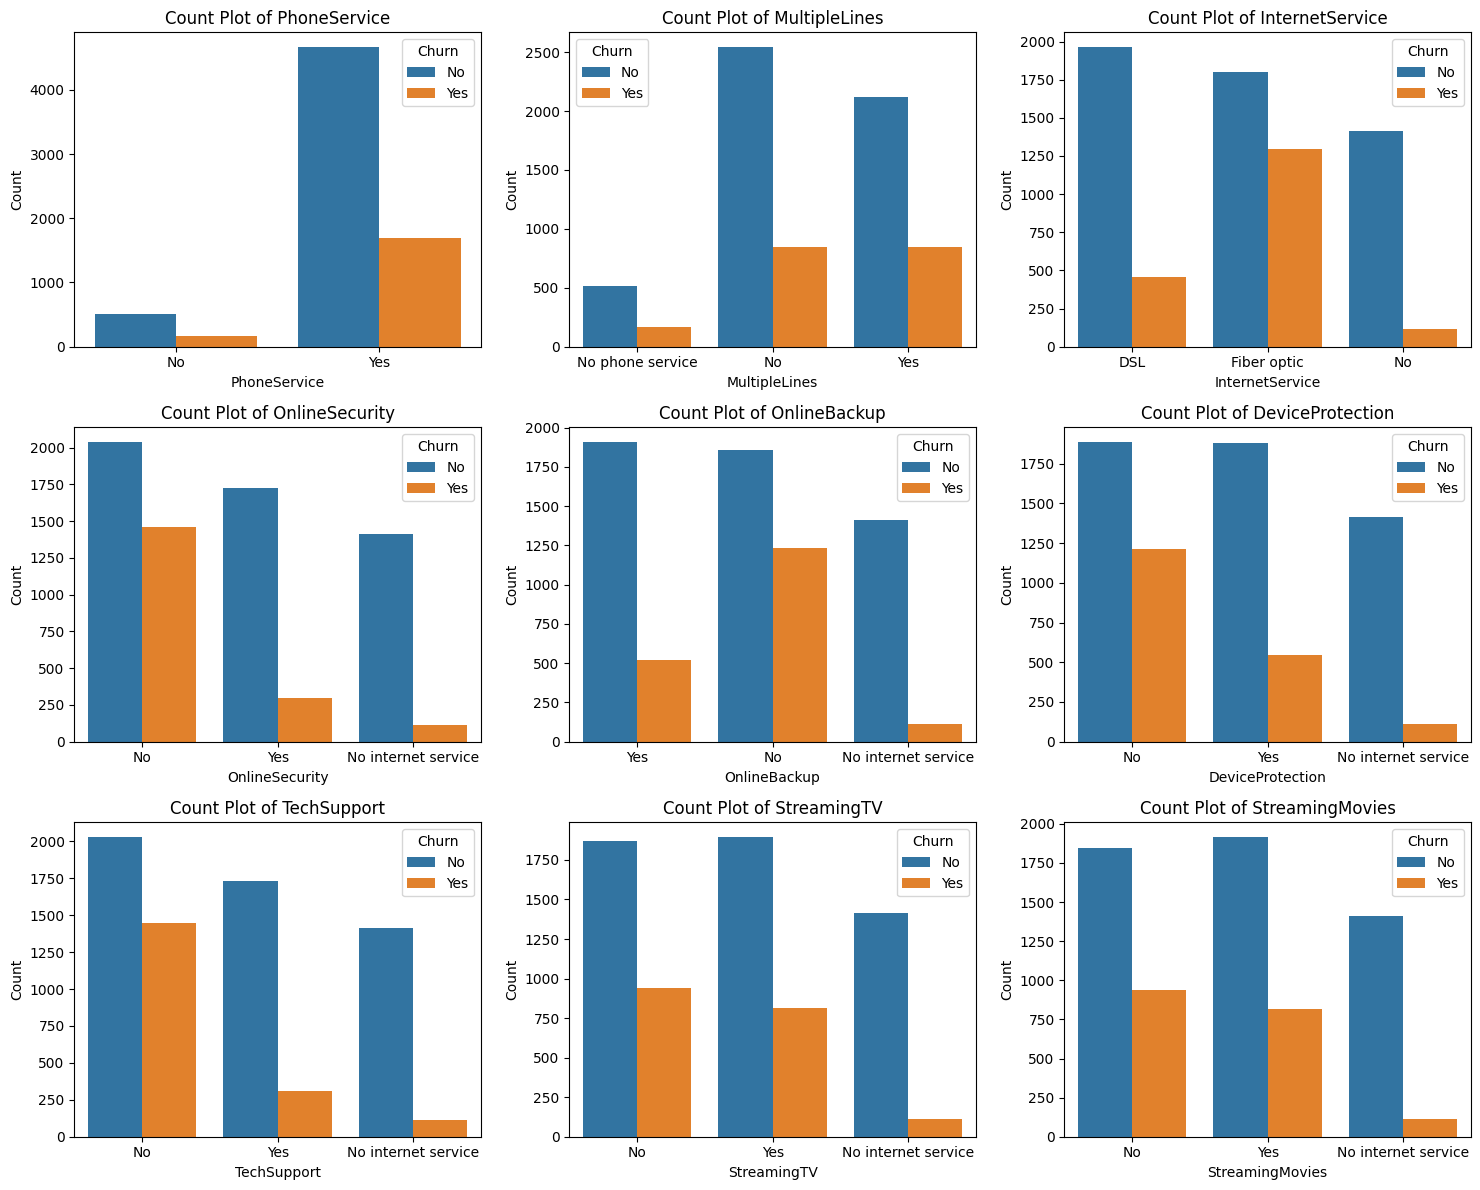

In [28]:
#list of columns for which we want to create count plots
columns=['PhoneService','MultipleLines','InternetService','OnlineSecurity',
          'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

#no of columns for the subplot grid(you can change this)
n_cols=3
n_rows=(len(columns) + n_cols - 1) // n_cols   #calculate the no of rows needed

#create subplots
fig,axes=plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  #adjust figsize as needed

#flatten the axes array for easy iteration(handles both 1d and 2d arrays)
axes=axes.flatten()

#iterate over columns and plot count plots
for i,col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue=df['Churn'])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

#remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()
    


#The majority of customers who donot churn tend to have services like phoneservices, internet services, particularily dsl, and online security
enabled for seervice like online backup tech support and streaming tv churn rates are noticebly higher when these services are not used or available the charts
emphasized the relationship between service usage and curstomer churn.

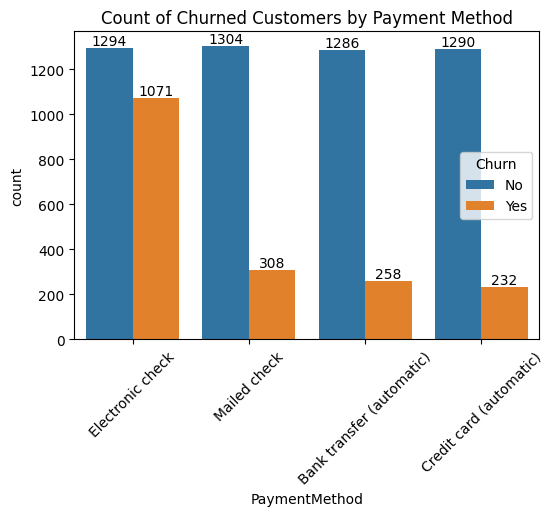

In [36]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Churned Customers by Payment Method")
plt.xticks(rotation=45)
plt.show()


#customers are likely to churn when they are using electronic method